<a href="https://colab.research.google.com/github/raviatkumar/Health-Insurance-Cross-Sell-Prediction/blob/main/Health_Insurance_Cross_Sell_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem statement**

**Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from the past year will also be interested in Vehicle Insurance provided by the company.
An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.**

**For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation, etc. for up to Rs. 200,000. Now if you are wondering how can the company bear such high hospitalisation costs when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes into the picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year, and not everyone. This way everyone shares the risk of everyone else.**

**Just like medical insurance, there is vehicle insurance where every year a customer needs to pay a premium of a certain amount to the insurance provider company so that in case of an unfortunate accident by the vehicle, the insurance provider company will provide compensation (called ‘sum assured’) to the customer.**

**Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.**

**Now, in order to predict whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel), etc.**

#**Data Description**

*   id: Unique ID for  customer
*   Age: Age of the customer
*   Driving_License 0 : Customer has DL or not 
*   Region_Code: Unique code for the region of the customer
*   Previously_Insured 1 : Customer already has Vehicle Insurance or not 
*   Vehicle_Age: Age of the Vehicle
*   Vehicle_Damage 1 : Past damages present or not 
*   Annual_Premium: The amount customer needs to pay as premium
*   PolicySalesChannel: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
*   Vintage: Number of Days, Customer has been associated with the company
*   Response  :Customer is interested or not 

#**A small insights from the problem statement and data description**

##**What is an insurance firm?**

*   If a loss occurred a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium.

##**What is the probability of buying an insurance?**

*   In insurance industry, it refers to a situation in which people only buy insurance when they expect high risks. Buying insurance is not appropriate for all levels and types of risks. In many cases, people are better off taking actions to avoid risk, retain (accept) risk or reduce risk. Buying insurance makes the most sense when the potential loss is great and there is a significant probability of loss.

##**How can an insurance firm protect its customers?**

*   Insurance company protects people and businesses against the risk of unforeseeable events. It is a risk transfer mechanism by which the losses of the few are paid for by the many, with the premiums based on the risk of each individual or entity


##**How many people are knowledgeable about insurance policy and how many of them claim insurance?**

* Lets say about four in 10 men describe themselves as being very knowledgeable about life insurance.  As in the problem statement, about 2 or 3 get hospitalized out of 100, which means 2 to 3 percent claim the insurance. This way everyone shares the risk of everyone else.


###So we need to building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue. Now, we need to predict whether the customer would be interested in Vehicle insurance or not.



In [130]:
#importing required libraries
import pandas as pd 
import numpy as np 
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings("ignore") 

**Load the dataset and print the shape of the dataset**

In [131]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [132]:
df=pd.read_csv('/content/drive/MyDrive/Health.csv')

In [133]:
print(f'The shape of the dataset is {df.shape[0]} rows and {df.shape[1]} columns')

The shape of the dataset is 381109 rows and 12 columns


##**EDA**

**Print the first and last 3 rows of columns**

In [134]:
df.head(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1


In [135]:
df.tail(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


**Check the column datatypes**

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


*   From the above dataset information,There are 14 columns, 10 columns are integer and float types and 4 columns are object types. 

**Understanding statistical data summaries**

In [137]:
df.describe(include='all').transpose() 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,381109.0,NaN,NaN,NaN,190555.0,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Gender,381109,2,Male,206089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,381109.0,NaN,NaN,NaN,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,NaN,NaN,NaN,0.997869,0.04611,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,NaN,NaN,NaN,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,NaN,NaN,NaN,0.45821,0.498251,0.0,0.0,0.0,1.0,1.0
Vehicle_Age,381109,3,1-2 Year,200316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle_Damage,381109,2,Yes,192413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Premium,381109.0,NaN,NaN,NaN,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,NaN,NaN,NaN,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0


**Checking for missing values in the dataset**

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64




<AxesSubplot:>

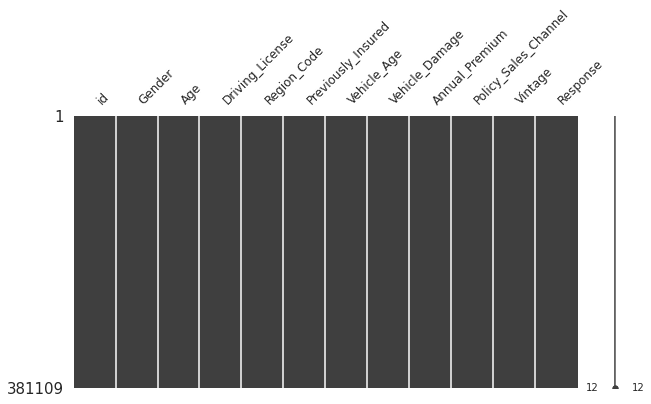

In [138]:
print(df.isnull().sum())
print('\n')
msno.matrix(df,figsize=(10,5), fontsize=12)

*   There are no missing values in the dataset


**Identifying and printing duplicate values**

In [139]:
duplicates =len(df[df.duplicated()])
print(duplicates)

0



*   there were no duplicate values found in the dataset


#**Response**

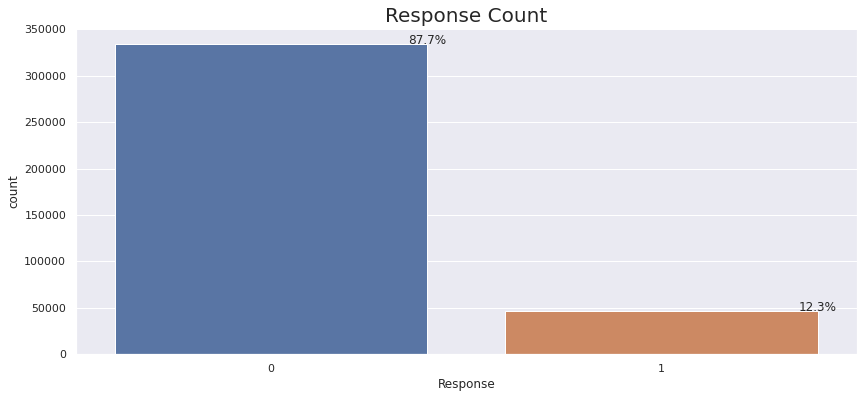

In [140]:
sns.set(style="darkgrid")
plt.figure(figsize=(14,6))
total = float(len(df))
ax = sns.countplot(x='Response', data=df)
plt.title('Response Count', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

*   Data are not balanced, 87.7% percent peopel are not interest and 12.3 percent people are interest. 


#**Gender variable**

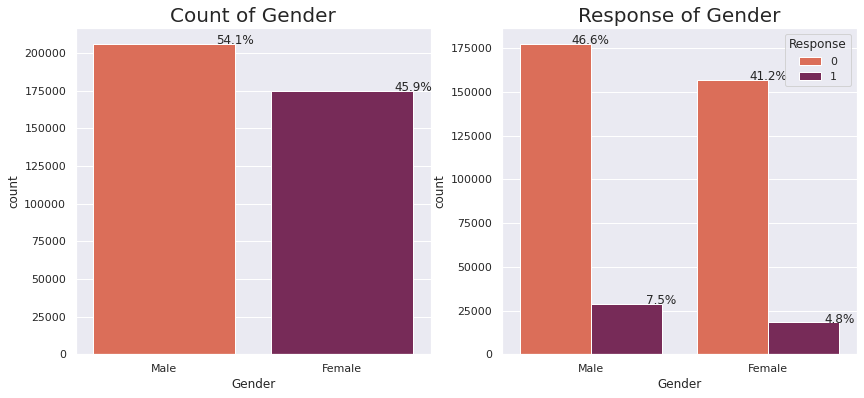

In [141]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.set(style="darkgrid")
total = float(len(df))
ax1 = sns.countplot(x='Gender',palette="rocket_r", data=df)
plt.title('Count of Gender',fontsize=20)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax1.annotate(percentage, (x, y),ha='center')
plt.subplot(1,2,2)
total = float(len(df))
ax2 = sns.countplot(x='Gender',hue='Response',palette="rocket_r", data=df)
plt.title('Response of Gender',fontsize=20)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y),ha='center')
plt.show()


As we can see from the graph,



* The gender variable in the dataset is spread nearly evenly. The male category is marginally larger than the female category, and the likelihood of purchasing insurance is also slightly higher.

* The response rate of those who are not interested in purchasing vehicle insurance is higher than that of those who are not interested to buy vehicle insurance.  (there could be various factors like people may not be aware of vehicle insurance policy, price may high etc).

* Only 12.3% people are interested in buying vehicle insurance and 87.7% are not interested to buy vehicle insurance


#**Driving License**

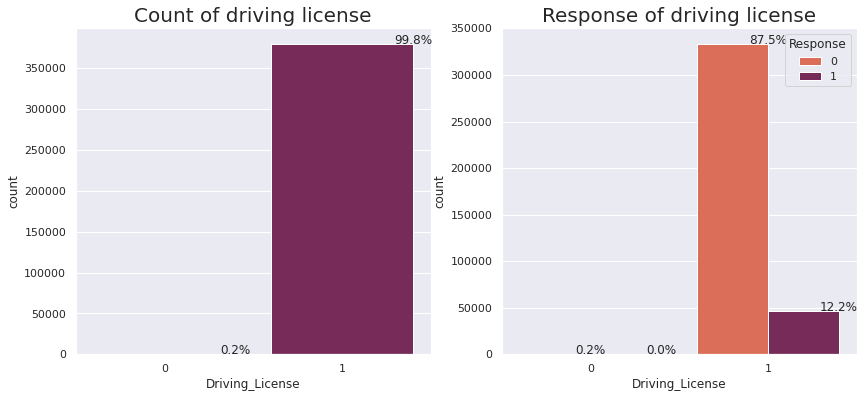

In [142]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.set(style="darkgrid")
total = float(len(df))
ax1 = sns.countplot(x='Driving_License',palette="rocket_r", data=df)
plt.title('Count of driving license',fontsize=20)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax1.annotate(percentage, (x, y),ha='center')
plt.subplot(1,2,2)
total = float(len(df))
ax2 = sns.countplot(x='Driving_License',hue='Response',palette="rocket_r", data=df)
plt.title('Response of driving license',fontsize=20)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y),ha='center')
plt.show()

As we can see from the graph,

*   99.8% of customers have DL, whereas 0.2% do not have DL.
*   Only a small percentage of people who have a DL (12.2%) are interested in 


#**Previously Insured**

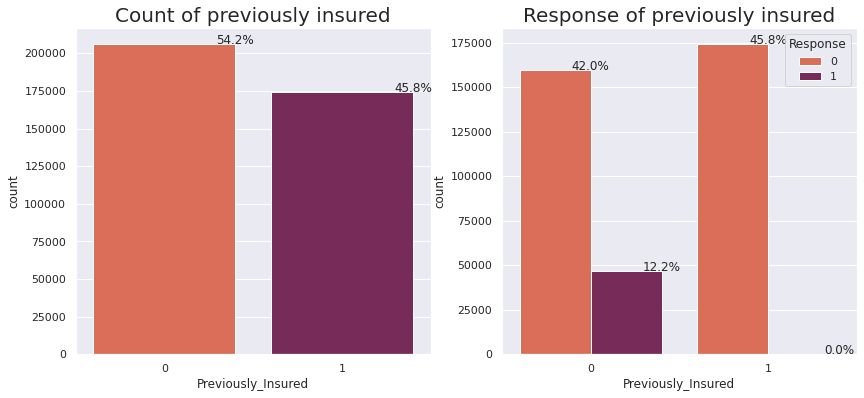

In [143]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.set(style="darkgrid")
total = float(len(df))
ax1 = sns.countplot(x='Previously_Insured',palette="rocket_r", data=df)
plt.title('Count of previously insured',fontsize=20)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax1.annotate(percentage, (x, y),ha='center')
plt.subplot(1,2,2)
total = float(len(df))
ax2 = sns.countplot(x='Previously_Insured',hue='Response',palette="rocket_r", data=df)
plt.title('Response of previously insured',fontsize=20)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y),ha='center')
plt.show()

As we can see from the graph,

*   45.8% people are insured previously, in that 12.2% poeple interested to buy the vehicle insurance again, Which means people are aware of insurance policy and ready to pay a premium amount, for better off taking actions to avoid certain risks or reduce risk. 

*   So buying insurance makes the most sense when the potential loss is great and there is a significant probability of loss.

#**Vehicle Age**

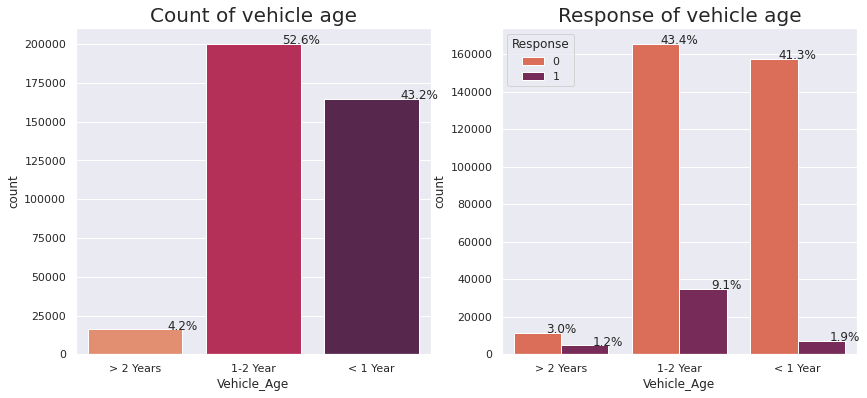

In [144]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.set(style="darkgrid")
total = float(len(df))
ax1 = sns.countplot(x='Vehicle_Age',palette="rocket_r", data=df)
plt.title('Count of vehicle age',fontsize=20)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax1.annotate(percentage, (x, y),ha='center')
plt.subplot(1,2,2)
total = float(len(df))
ax2 = sns.countplot(x='Vehicle_Age',hue='Response',palette="rocket_r", data=df)
plt.title('Response of vehicle age',fontsize=20)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y),ha='center')
plt.show()

As we can see from the graph,

*   Around 4.2% of vehicles are more than two years old, 52.6% are between one and two years old, and 43.2% are under one year old.
*   1.2% are interested in purchasing vehicle insurance for vehicles older than 2 years, 9.1% are interested in purchasing insurance for vehicles between 1 and 2 years old, and 1.9% are interested in purchasing insurance for vehicles older than 1 year.

As vehicle age increases most of the people are aware of insurance and interested to buy the insurance for reducing the risk


#**Annual Premium**

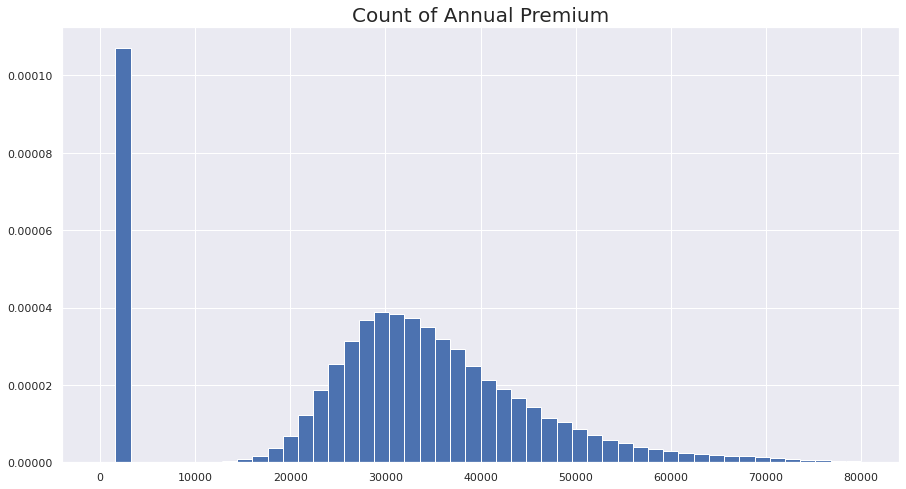

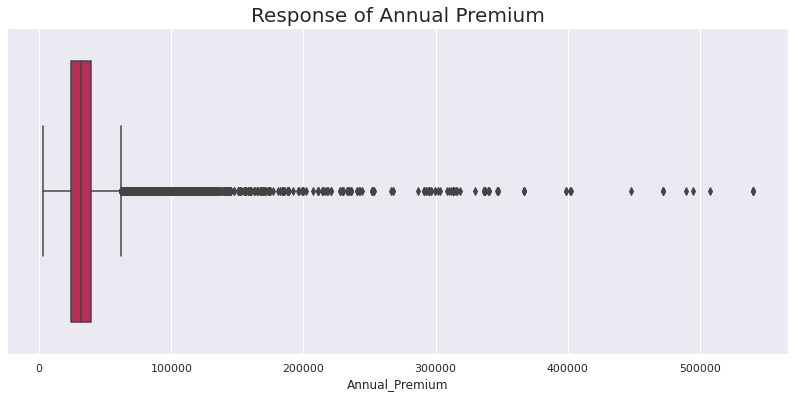

In [145]:
plt.figure(figsize=(14,6))
sns.set(style="darkgrid")
df['Annual_Premium'].hist(figsize=(15,8), bins = 50, density = True, range=[0, 80000])
plt.title('Count of Annual Premium',fontsize=20)
plt.show()
plt.figure(figsize=(14,6))
sns.boxplot(x='Annual_Premium',palette="rocket_r", data=df)
plt.title('Response of Annual Premium',fontsize=20)
plt.show()

*   From the distribution plot we can infer that the annual premimum variable is right skewed
*   From the boxplot we can observe lot of outliers in the variable 


#**Vechicle Damage**

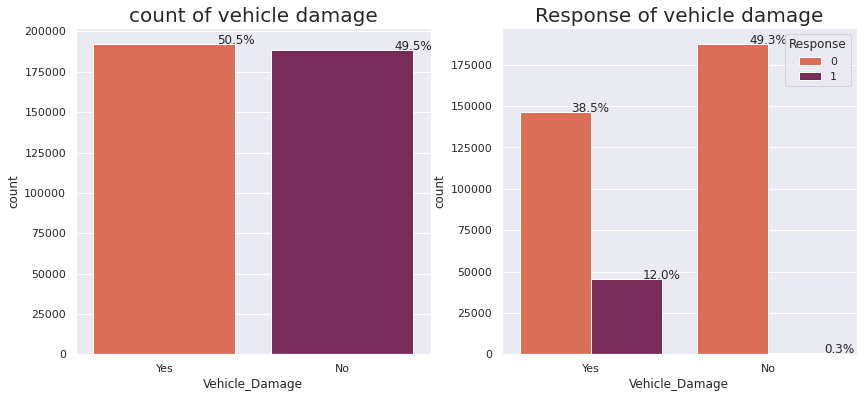

In [146]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.set(style="darkgrid")
total = float(len(df))
ax1 = sns.countplot(x='Vehicle_Damage',palette="rocket_r", data=df)
plt.title('count of vehicle damage',fontsize=20)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax1.annotate(percentage, (x, y),ha='center')
plt.subplot(1,2,2)
total = float(len(df))
ax2 = sns.countplot(x='Vehicle_Damage',hue='Response',palette="rocket_r", data=df)
plt.title('Response of vehicle damage',fontsize=20)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y),ha='center')
plt.show()

As we can see from the graph,

*   50.5% of the vehicles have past damage
*   12.0% of people who have had a damaged vehicle in the past want to acquire vehicle insurance


#**Vintage**

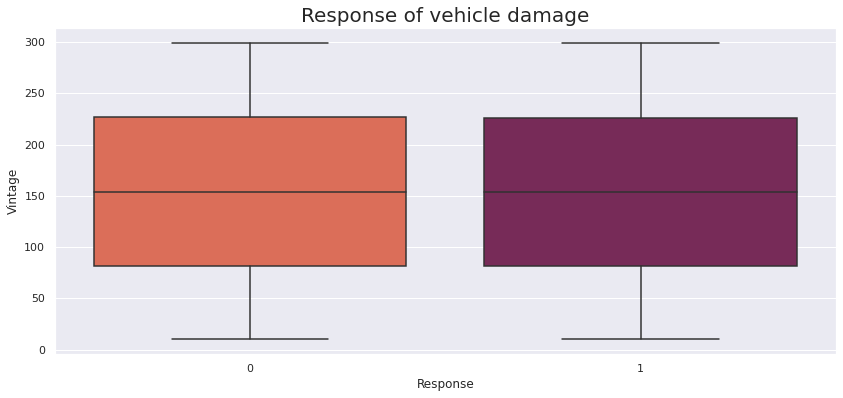

In [147]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Response',y='Vintage',palette="rocket_r", data=df)
plt.title('Response of vehicle damage',fontsize=20)
plt.show()


*   We can also see that Vintage has an almost uniform distribution from above figure.


#**Region Code**

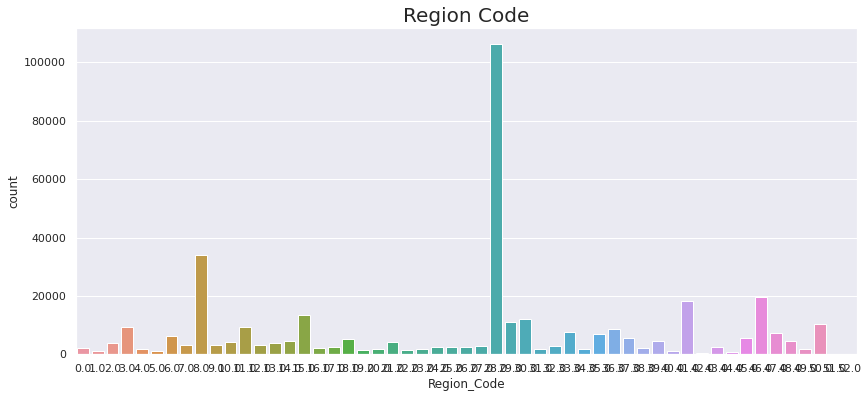

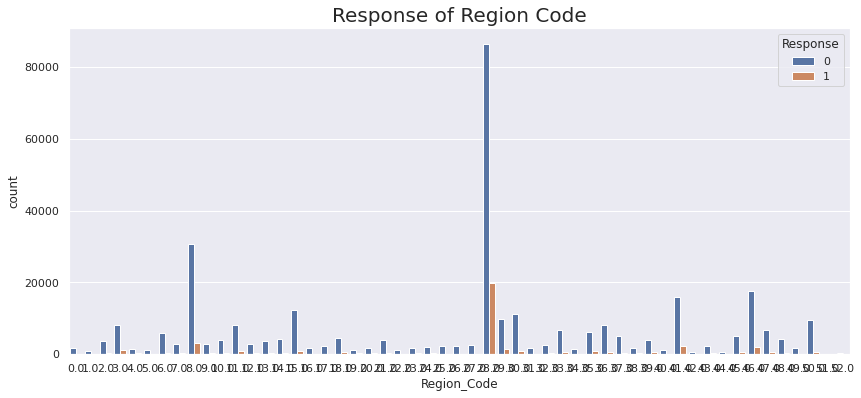

In [148]:
plt.figure(figsize = (14,6))
sns.countplot(df['Region_Code'])
plt.title('Region Code',fontsize=20)
plt.show()
plt.figure(figsize = (14,6))
sns.countplot(df['Region_Code'],hue=df['Response'])
plt.title('Response of Region Code',fontsize=20)
plt.show()

#Age

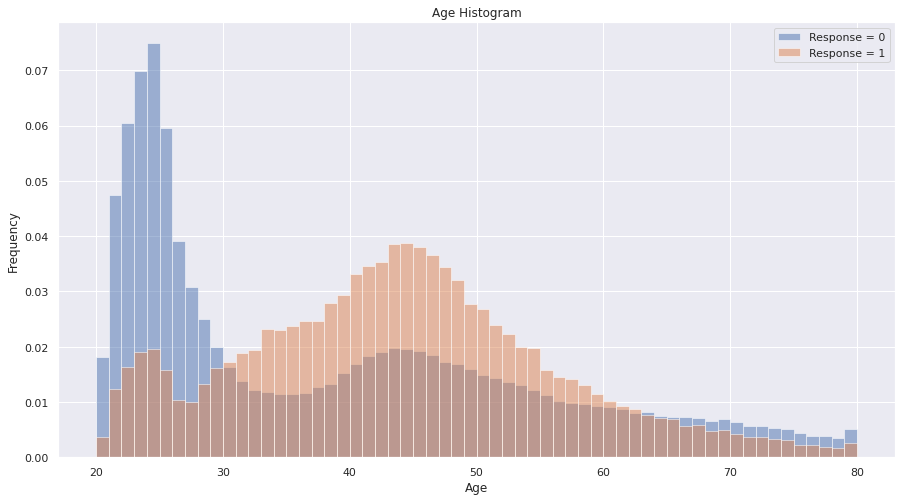

In [149]:
#histogram of Age
plt.figure(figsize = (14,6))
df.groupby('Response').Age.hist(range=[20, 80], align = 'mid', bins=60, figsize=(15,8), density = True, alpha = 0.5)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Histogram')
plt.legend(['Response = 0', 'Response = 1'])
plt.show()

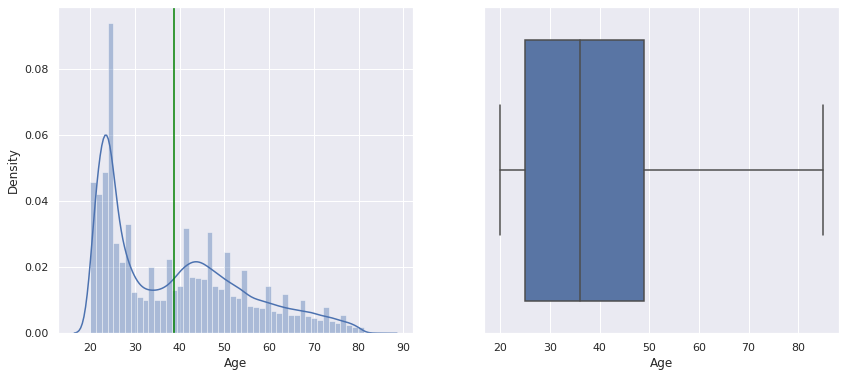

In [150]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
ax=sns.distplot(df['Age'])
ax.axvline(df['Age'].mean(),color='green')
plt.subplot(1,2,2)
sns.boxplot(x = 'Age',data=df)
plt.show()

*   The dataset has more individuals with an age of 24.
*   40 to 60-year-olds had a higher likelihood of purchasing vehicle insurance.
*   From the above boxplot we can see that there no outlier in the dataset.

In [151]:
df['Ages']=df['Age']

df.loc[(df['Ages']>=20) & (df['Ages']<27),'Age_label']='Teenagers(20-26)' 
df.loc[(df['Ages']>=27) & (df['Ages']<29),'Age_label']='Young(27-28)' 
df.loc[(df['Ages']>=29) & (df['Ages']<58),'Age_label']='Middle Age(29-57)' 
df.loc[(df['Ages']>=58) & (df['Ages']<=85),'Age_label']='Old Age(58-84)' 

df.loc[(df['Ages']>=20) & (df['Ages']<27),'Ages']=0 
df.loc[(df['Ages']>=27) & (df['Ages']<29),'Ages']=1 
df.loc[(df['Ages']>=29) & (df['Ages']<58),'Ages']=2
df.loc[(df['Ages']>=58) & (df['Ages']<=85),'Ages']=3

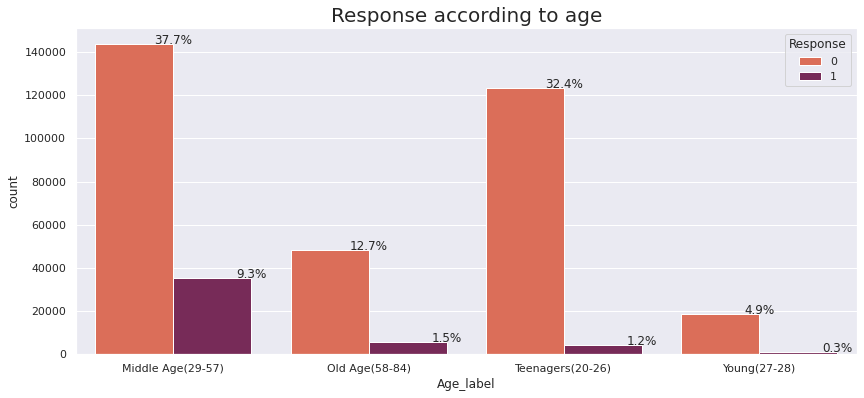

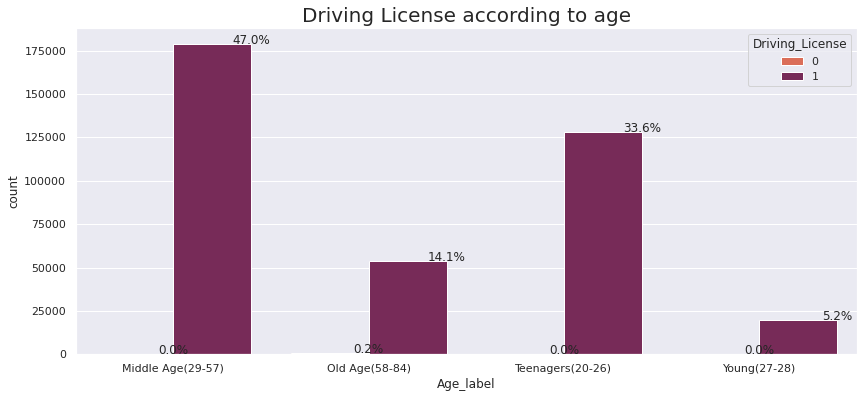

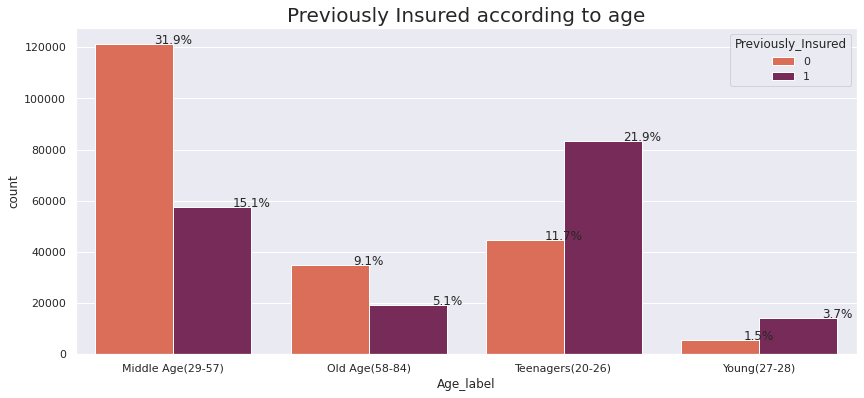

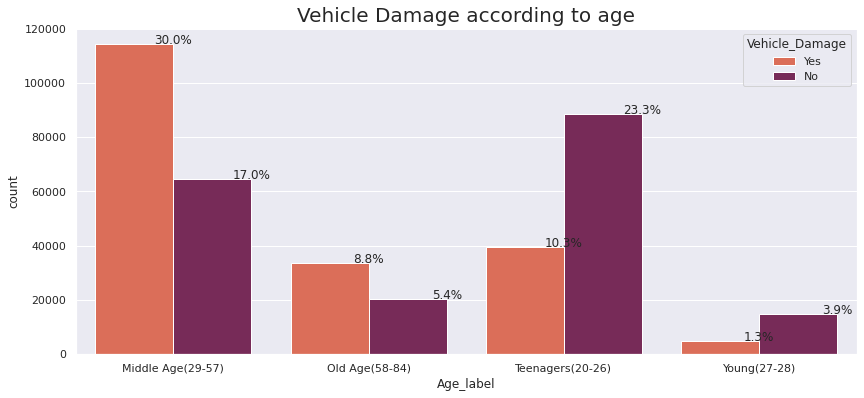

In [152]:
plt.figure(figsize=(14,6))
sns.set(style="darkgrid")
total = float(len(df))
ax = sns.countplot(x='Age_label',hue='Response',palette="rocket_r", data=df)
plt.title('Response according to age',fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

plt.figure(figsize=(14,6))
sns.set(style="darkgrid")
total = float(len(df))
ax = sns.countplot(x='Age_label',hue='Driving_License',palette="rocket_r", data=df)
plt.title('Driving License according to age',fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

plt.figure(figsize=(14,6))
sns.set(style="darkgrid")
total = float(len(df))
ax = sns.countplot(x='Age_label',hue='Previously_Insured',palette="rocket_r", data=df)
plt.title('Previously Insured according to age',fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

plt.figure(figsize=(14,6))
sns.set(style="darkgrid")
total = float(len(df))
ax = sns.countplot(x='Age_label',hue='Vehicle_Damage',palette="rocket_r", data=df)
plt.title('Vehicle Damage according to age',fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()



According to age wise:

*   9.3% of people in their middle age people are interested in purchasing insurance.
*   Almost 47% of middle-aged individuals have a driver's licence.
*   About 21.9% of people in their teens have health insurance.
*   Around 21.9% of persons in their teens have had insurance previously.




In [153]:
df.drop(columns=['Ages','Age_label'],axis=1,inplace=True)

#**Correlation Matrix**

<AxesSubplot:>

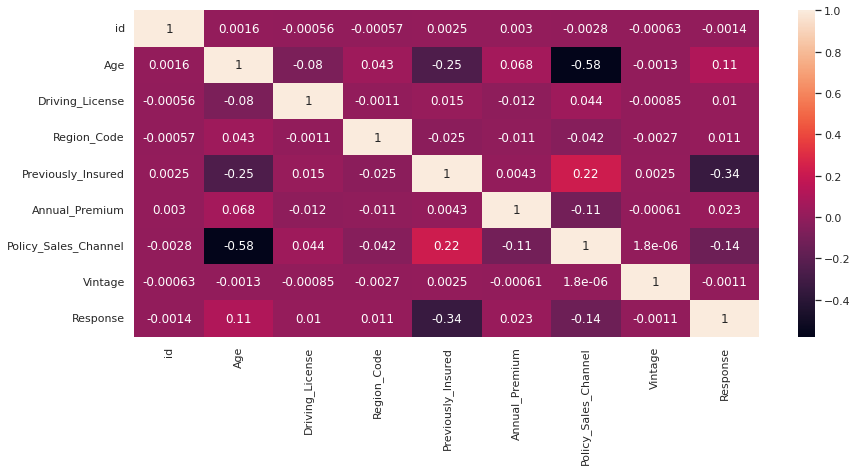

In [154]:
plt.figure(figsize = (14,6))
sns.heatmap(df.corr(), annot = True)

In [155]:
# Finding Multicollinearity
def cal_vif(X):
    # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
   return(vif)

In [156]:
cal_vif(df[[i for i in df.describe().columns if i not in ['Response']]])

,variables,VIF
0,id,3.976952
1,Age,10.457630
2,Driving_License,37.690580
3,Region_Code,4.954198
4,Previously_Insured,1.986389
5,Annual_Premium,4.174946
6,Policy_Sales_Channel,7.750265
7,Vintage,4.373295


In [157]:
df.drop(columns=['Driving_License'],axis=1,inplace=True)

**Correlation**: You can only determine how much two variables are linearly reliant on one another by looking at their correlations.


*   The variables are said to be positively connected if the value is positive.

*   The variables are said to be negatively linked if the value is negative.
*   It is said that there is no correlation between the variables if the value is zero or very near to it.

Since practically every customer has a driver's license, it is useless to insure anyone without one because it would be detrimental to the business. Hence, we wouldn't provide vehicle insurance to someone who didn't have a license to drive. As we can drop driving license column as they are not providing any valuable information.



##**Removing outliers**

In [158]:
#outlier column
outlier_column=['Annual_Premium']
#determining the inter-quartile range for the columns with outliers
Q1 = df[outlier_column].quantile(0.25)
Q3 = df[outlier_column].quantile(0.75)
IQR = Q3-Q1
IQR

Annual_Premium    14995.0
dtype: float64

In [159]:
# determining the upper and lower limit for the removal of outliers
upper_limit = Q3 + (1.5*IQR)
lower_limit = Q1 - (1.5*IQR)
df[outlier_column] = df[outlier_column][~((df[outlier_column] < lower_limit) | (df[outlier_column] > upper_limit))]

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        370789 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB


##**Handling null values**


In [161]:
df['Annual_Premium'] = df['Annual_Premium'].fillna(df['Annual_Premium'].median())

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB



*   We have used the quantile approach to address outliers.


##**Feature encoding:**

In [163]:
df['Gender'] = df['Gender'].map({'Female':1, 'Male':0})
df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'Yes':1, 'No':0})
df['Vehicle_Age'] = df['Vehicle_Age'].map({'1-2 Year':1, '< 1 Year':0, '> 2 Years': 2})

In [164]:
df.head()

,id,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,44,28.0,0,2,1,40454.0,26.0,217,1
1,2,0,76,3.0,0,1,0,33536.0,26.0,183,0
2,3,0,47,28.0,0,2,1,38294.0,26.0,27,1
3,4,0,21,11.0,1,0,0,28619.0,152.0,203,0
4,5,1,29,41.0,1,0,0,27496.0,152.0,39,0


#**Model Building**

In [165]:
x=df[['Gender','Age','Previously_Insured','Vehicle_Age','Vehicle_Damage','Annual_Premium','Vintage']]
y=df['Response']

Before OverSampling, counts of label '1': 46710
Before OverSampling, counts of label '0': 334399 

After OverSampling, counts of label '1': 334399
After OverSampling, counts of label '0': 334399 





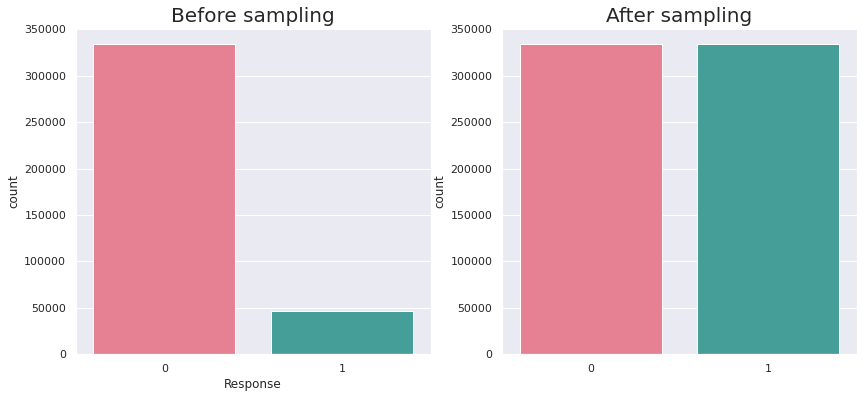

In [166]:
sm=SMOTE()
x_new, y_new = sm.fit_resample(x, y.ravel())

print("Before OverSampling, counts of label '1': {}".format(sum(y == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0))) 
print("After OverSampling, counts of label '1': {}".format(sum(y_new == 1))) 
print("After OverSampling, counts of label '0': {} \n".format(sum(y_new == 0))) 
print('\n')

plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.countplot(y,palette='husl')
plt.title('Before sampling',fontsize=20)
plt.subplot(1,2,2)
sns.countplot(y_new,palette='husl')
plt.title('After sampling',fontsize=20)
plt.show()

##**Train Test Split**

In [167]:
X_train, X_test ,y_train, y_test=  train_test_split(x_new, y_new, random_state=42, test_size=0.3)
print(X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)     

(468158, 7) (468158,)
(200640, 7) (200640,)


In [168]:
# Normalizing the Dataset using Standard Scaling Technique.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#**Machine Learning Algorithms**

Let's try various machine learning models on our data set to see how they each perform.

*   Logitcal Regression
*   Decision Tree
*   Random Forest
*   Gradient Boost
*   XGBoost
*   LightBGM

##**Logistic Regression**

In [169]:
#Importing Logistic Regression
logistic_model = LogisticRegression(random_state=30)
logistic_model=logistic_model.fit(X_train,y_train)
#Making prediction
y_pred_lg = logistic_model.predict(X_test)
y_pred_prob_lg = logistic_model.predict_proba(X_test)[:,1]

In [170]:
# Evaluation
RS_lgt= recall_score(y_test, y_pred_lg)
print("Recall_Score : ", RS_lgt)

PS_lgt= precision_score(y_test, y_pred_lg)
print("Precision_Score :",PS_lgt)

f1S_lgt= f1_score(y_test, y_pred_lg)
print("f1_Score :", f1S_lgt)

AS_lgt= accuracy_score(y_pred_lg, y_test)
print("Accuracy_Score :",AS_lgt)

acu_lgt = roc_auc_score(y_pred_lg, y_test)
print("ROC_AUC Score:",acu_lgt)

Recall_Score :  0.9339926769083817
Precision_Score : 0.7170027497708524
f1_Score : 0.8112382466814159
Accuracy_Score : 0.7822767145135566
ROC_AUC Score: 0.8109253565262754


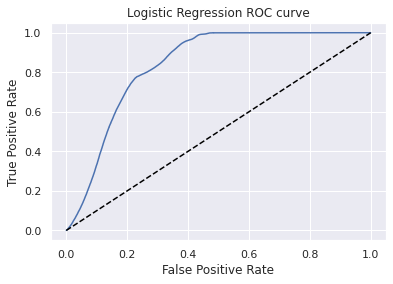

In [171]:
#ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_lg)
plt.title('Logistic Regression ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

[[63086 37050]
 [ 6634 93870]]




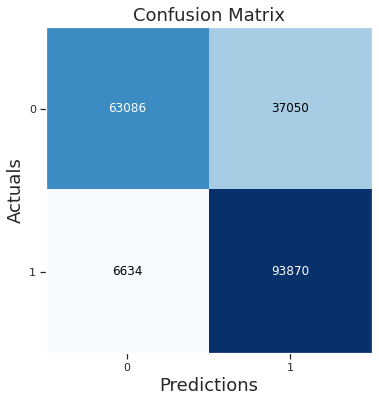

In [172]:
#confusion matrix
cm_logistic = confusion_matrix(y_test, y_pred_lg)
print(cm_logistic)
print('\n')
fig, ax = plot_confusion_matrix(conf_mat=cm_logistic, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [173]:
print(classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

           0       0.90      0.63      0.74    100136
           1       0.72      0.93      0.81    100504

    accuracy                           0.78    200640
   macro avg       0.81      0.78      0.78    200640
weighted avg       0.81      0.78      0.78    200640



**Model Coefficients**

In [174]:
print(logistic_model.coef_)

[[-0.53716379 -0.07334916 -2.85501328  0.03517609  0.67730247  0.03840407
  -0.00526019]]


Previously_Insured   -2.855013
Gender               -0.537164
Age                  -0.073349
Vintage              -0.005260
Vehicle_Age           0.035176
Annual_Premium        0.038404
Vehicle_Damage        0.677302
dtype: float64




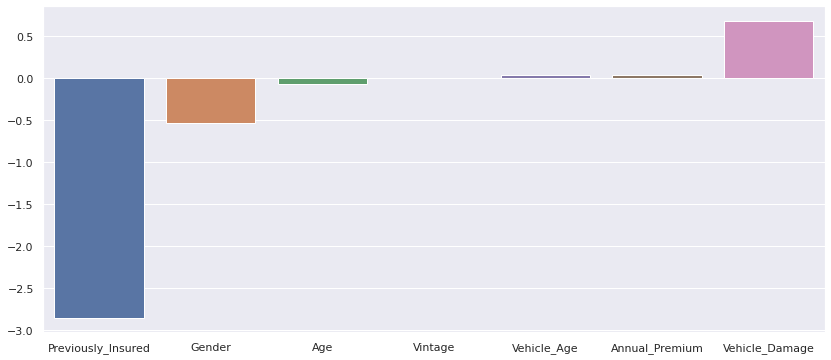

In [175]:
coef = pd.Series(data=logistic_model.coef_[0], index=x.columns)
coef = coef.sort_values()
print(coef)
print('\n')
plt.figure(figsize=(14,6))
sns.barplot(x=coef.index, y=coef.values);
plt.show()

#**Decision Tree**

In [176]:
dt_model = DecisionTreeClassifier(random_state=30)
dt_model=dt_model.fit(X_train, y_train)
#Making prediction
dt_pred = dt_model.predict(X_test)
dt_pred_prob = dt_model.predict_proba(X_test)[:,1]

In [177]:
# Evaluation
RS_dt= recall_score(y_test, dt_pred)
print("Recall_Score : ", RS_dt)

PS_dt= precision_score(y_test, dt_pred)
print("Precision_Score :",PS_dt)

f1S_dt= f1_score(y_test, dt_pred)
print("f1_Score :", f1S_dt)

AS_dt= accuracy_score(y_test, dt_pred)
print("Accuracy_Score :",AS_dt)

acu_dt = roc_auc_score(y_test, dt_pred)
print("ROC_AUC Score:",acu_dt)

Recall_Score :  0.8437276128313301
Precision_Score : 0.8095042624077592
f1_Score : 0.826261710928251
Accuracy_Score : 0.8222637559808612
ROC_AUC Score: 0.8222243161224638


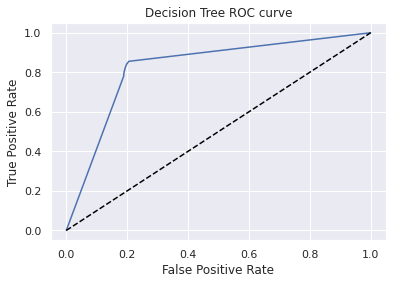

In [178]:
#ROC Curve
fpr, tpr, _ = roc_curve(y_test, dt_pred_prob)
plt.title('Decision Tree ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

[[80181 19955]
 [15706 84798]]




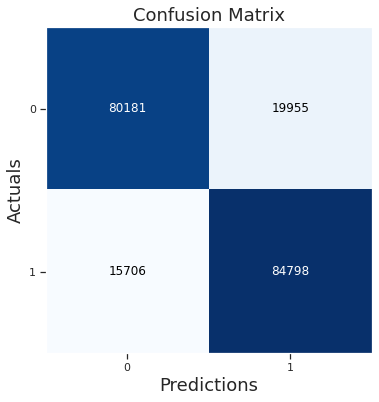

In [179]:
#ROC Curve
cm_dt= confusion_matrix(y_test, dt_pred)
print(cm_dt)
print('\n')
fig, ax = plot_confusion_matrix(conf_mat=cm_dt, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [180]:
print(classification_report(dt_pred, y_test))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82     95887
           1       0.84      0.81      0.83    104753

    accuracy                           0.82    200640
   macro avg       0.82      0.82      0.82    200640
weighted avg       0.82      0.82      0.82    200640



#**Random Forest**

In [181]:
#Importing Random Forest
rf_model= RandomForestClassifier(random_state=30)
rf_model= rf_model.fit(X_train, y_train)
#Making prediction
rf_pred= rf_model.predict(X_test)
rf_pred_proba= rf_model.predict_proba(X_test)[:,1]

In [182]:
# Evaluation
RS_rf= recall_score(y_test, rf_pred)
print("Recall_Score : ", RS_lgt)

PS_rf= precision_score(y_test, rf_pred)
print("Precision_Score :",PS_lgt)

f1S_rf= f1_score(y_test, rf_pred)
print("f1_Score :", f1S_lgt)

AS_rf= accuracy_score(y_test, rf_pred)
print("Accuracy_Score :",AS_lgt)

acu_rf = roc_auc_score(y_test, rf_pred)
print("ROC_AUC Score:",acu_lgt)

Recall_Score :  0.9339926769083817
Precision_Score : 0.7170027497708524
f1_Score : 0.8112382466814159
Accuracy_Score : 0.7822767145135566
ROC_AUC Score: 0.8109253565262754


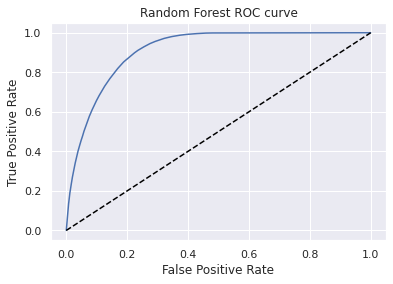

In [183]:
#ROC Curve
fpr, tpr, _ = roc_curve(y_test, rf_pred_proba)
plt.title('Random Forest ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

[[78080 22056]
 [10692 89812]]




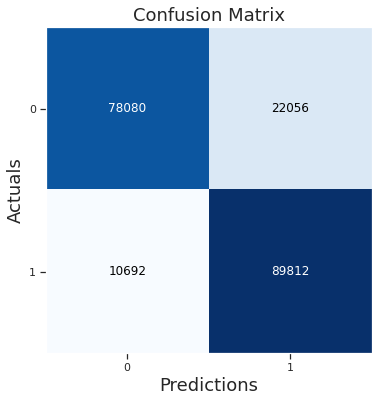

In [184]:
#confusion matrix
cm_rf= confusion_matrix(y_test, rf_pred)
print(cm_rf)
print('\n')
fig, ax = plot_confusion_matrix(conf_mat=cm_rf, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [185]:
print(classification_report(rf_pred, y_test))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83     88772
           1       0.89      0.80      0.85    111868

    accuracy                           0.84    200640
   macro avg       0.84      0.84      0.84    200640
weighted avg       0.84      0.84      0.84    200640



#**KNN Classifier**

In [186]:
knn_model=KNeighborsClassifier()
knn_model=knn_model.fit(X_train,y_train)
#Making prediction
knn_pred = knn_model.predict(X_test)
knn_pred_prob = knn_model.predict_proba(X_test)[:,1]

In [187]:
# Evaluation
RS_knn= recall_score(y_test, knn_pred)
print("Recall_Score : ", RS_lgt)

PS_knn= precision_score(y_test, knn_pred)
print("Precision_Score :",PS_lgt)

f1S_knn= f1_score(y_test, knn_pred)
print("f1_Score :", f1S_lgt)

AS_knn= accuracy_score(y_test, knn_pred)
print("Accuracy_Score :",AS_lgt)

acu_knn = roc_auc_score(y_test, knn_pred)
print("ROC_AUC Score:",acu_knn)

Recall_Score :  0.9339926769083817
Precision_Score : 0.7170027497708524
f1_Score : 0.8112382466814159
Accuracy_Score : 0.7822767145135566
ROC_AUC Score: 0.8167187924112771


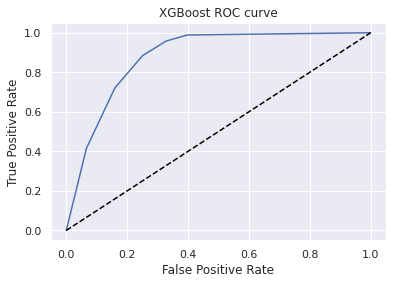

In [188]:
fpr, tpr, _ = roc_curve(y_test, knn_pred_prob)
plt.title('XGBoost ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

[[75105 25031]
 [11718 88786]]




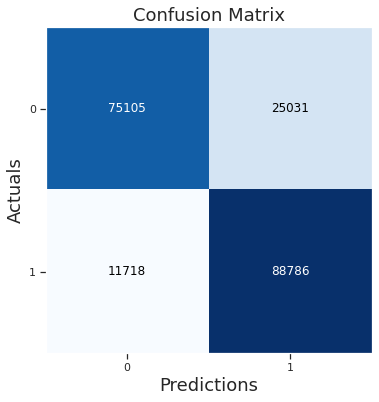

In [189]:
from mlxtend.plotting import plot_confusion_matrix
cm_knn= confusion_matrix(y_test, knn_pred)
print(cm_knn)
print('\n')
fig, ax = plot_confusion_matrix(conf_mat=cm_knn, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [190]:
print(classification_report(knn_pred, y_test))

              precision    recall  f1-score   support

           0       0.75      0.87      0.80     86823
           1       0.88      0.78      0.83    113817

    accuracy                           0.82    200640
   macro avg       0.82      0.82      0.82    200640
weighted avg       0.83      0.82      0.82    200640



#**Gradient Boosting**

In [191]:
GB_model=GradientBoostingClassifier(random_state=30)
GB_model=GB_model.fit(X_train,y_train)
#Making prediction
GB_pred = GB_model.predict(X_test)
GB_pred_prob = GB_model.predict_proba(X_test)[:,1]

In [192]:
# Evaluation
RS_GB= recall_score(y_test, GB_pred)
print("Recall_Score : ", RS_GB)

PS_GB= precision_score(y_test, GB_pred)
print("Precision_Score :",PS_GB)

f1S_GB= f1_score(y_test, GB_pred)
print("f1_Score :", f1S_GB)

AS_GB= accuracy_score(y_test, GB_pred)
print("Accuracy_Score :",AS_GB)

acu_GB = roc_auc_score(y_test, GB_pred)
print("ROC_AUC Score:",acu_GB)

Recall_Score :  0.9187694022128472
Precision_Score : 0.7607952345249768
f1_Score : 0.8323530604794549
Accuracy_Score : 0.8146082535885167
ROC_AUC Score: 0.8144168573738997


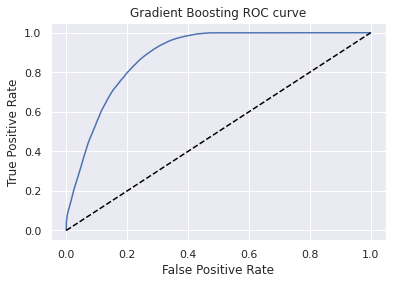

In [193]:
#ROC Curve
fpr, tpr, _ = roc_curve(y_test, GB_pred_prob)
plt.title('Gradient Boosting ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

[[71103 29033]
 [ 8164 92340]]




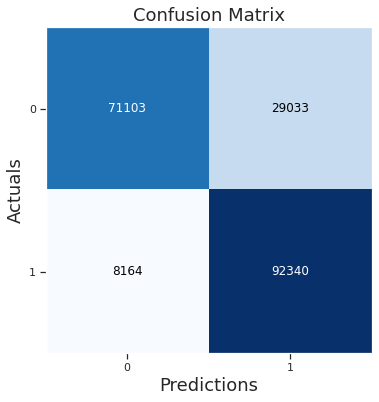

In [194]:
#Confusion matrix
cm_GB= confusion_matrix(y_test, GB_pred)
print(cm_GB)
print('\n')
fig, ax = plot_confusion_matrix(conf_mat=cm_GB, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [195]:
print(classification_report(GB_pred, y_test))

              precision    recall  f1-score   support

           0       0.71      0.90      0.79     79267
           1       0.92      0.76      0.83    121373

    accuracy                           0.81    200640
   macro avg       0.81      0.83      0.81    200640
weighted avg       0.84      0.81      0.82    200640



#**XGBoost**

In [196]:
XG_model= XGBClassifier(random_state=30)
XG_model= XG_model.fit(X_train, y_train)
#Making prediction
XG_pred = XG_model.predict(X_test)
XG_pred_prob = XG_model.predict_proba(X_test)[:,1]

In [197]:
# Evaluation
RS_XG= recall_score(y_test, XG_pred)
print("Recall_Score : ", RS_XG)

PS_XG= precision_score(y_test, XG_pred)
print("Precision_Score :",PS_XG)

f1S_XG= f1_score(y_test, XG_pred)
print("f1_Score :", f1S_XG)

AS_XG= accuracy_score(y_test, XG_pred)
print("Accuracy_Score :",AS_XG)

acu_XG = roc_auc_score(y_test, XG_pred)
print("ROC_AUC Score:",acu_XG)

Recall_Score :  0.9166102841677943
Precision_Score : 0.769673576125189
f1_Score : 0.8367401621290219
Accuracy_Score : 0.8208283492822966
ROC_AUC Score: 0.8206523498812927


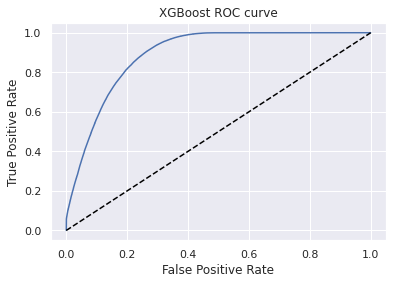

In [198]:
#ROC Curve
fpr, tpr, _ = roc_curve(y_test, XG_pred_prob)
plt.title('XGBoost ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

[[72568 27568]
 [ 8381 92123]]




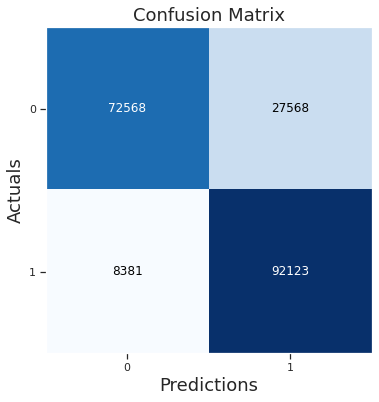

In [199]:
#Confucion matrix
cm_XB= confusion_matrix(y_test, XG_pred)
print(cm_XB)
print('\n')
fig, ax = plot_confusion_matrix(conf_mat=cm_XB, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [200]:
print(classification_report(XG_pred, y_test))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80     80949
           1       0.92      0.77      0.84    119691

    accuracy                           0.82    200640
   macro avg       0.82      0.83      0.82    200640
weighted avg       0.84      0.82      0.82    200640



#**LightBGM**

In [201]:
lgbm_model=LGBMClassifier(random_state=30)
lgbm_model=lgbm_model.fit(X_train,y_train)
#Making prediction
lgbm_pred = lgbm_model.predict(X_test)
lgbm_pred_prob = lgbm_model.predict_proba(X_test)[:,1]

In [202]:
# Evaluation
RS_lgbm= recall_score(y_test, lgbm_pred)
print("Recall_Score : ", RS_GB)

PS_lgbm= precision_score(y_test, lgbm_pred)
print("Precision_Score :",PS_GB)

f1S_lgbm= f1_score(y_test, lgbm_pred)
print("f1_Score :", f1S_GB)

AS_lgbm= accuracy_score(y_test, lgbm_pred)
print("Accuracy_Score :",AS_GB)

acu_lgbm = roc_auc_score(y_test, lgbm_pred)
print("ROC_AUC Score:",acu_GB)

Recall_Score :  0.9187694022128472
Precision_Score : 0.7607952345249768
f1_Score : 0.8323530604794549
Accuracy_Score : 0.8146082535885167
ROC_AUC Score: 0.8144168573738997


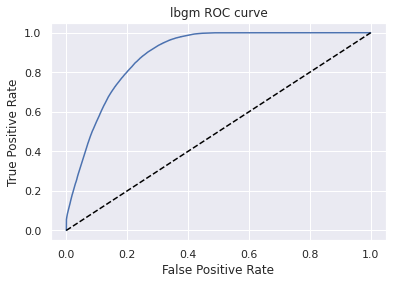

In [203]:
#ROC Curve
fpr, tpr, _ = roc_curve(y_test, lgbm_pred_prob)
plt.title('lbgm ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

[[71996 28140]
 [ 8540 91964]]




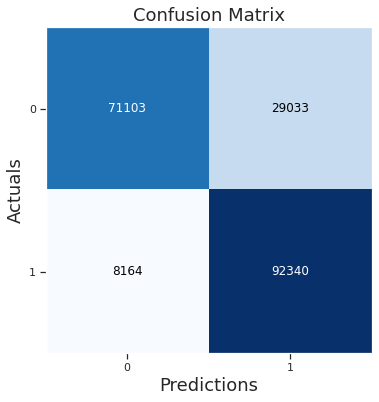

In [204]:
#Confusion matrix
cm_lgbm= confusion_matrix(y_test, lgbm_pred)
print(cm_lgbm)
print('\n')
fig, ax = plot_confusion_matrix(conf_mat=cm_GB, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [205]:
print(classification_report(lgbm_pred, y_test))

              precision    recall  f1-score   support

           0       0.72      0.89      0.80     80536
           1       0.92      0.77      0.83    120104

    accuracy                           0.82    200640
   macro avg       0.82      0.83      0.82    200640
weighted avg       0.84      0.82      0.82    200640



#Result of all models

In [206]:
list_of_model = ['Logistic Regression','Decision Tree ','Random Forest','KNN','Gradient Boosting','Extreme Gradient Boosting','LGBM']

In [207]:
result_list_RS = [RS_lgt,RS_dt,RS_rf,RS_knn,RS_GB,RS_XG,RS_lgbm]
result_list_PS = [PS_lgt,RS_dt,PS_rf,PS_knn,PS_GB,PS_XG,PS_lgbm]
result_list_f1S = [f1S_lgt,f1S_dt,f1S_rf,f1S_knn,f1S_GB,f1S_XG,f1S_lgbm]
result_list_AS = [AS_lgt,AS_dt,AS_rf,AS_knn,AS_GB,AS_XG,AS_lgbm]
relust_list_Acu=[acu_lgt,acu_dt,acu_rf,acu_knn,acu_GB,acu_XG,acu_lgbm]

In [208]:
# creating an empty dataframe
results_df = pd.DataFrame()

In [209]:
results_df['model_name'] = list_of_model
results_df['Recall_Score'] = result_list_RS
results_df['Precision_Score'] = result_list_PS
results_df['f1_Score'] = result_list_f1S 
results_df['Accuracy_Score'] = result_list_AS
results_df['ROC_AUC Score'] = relust_list_Acu

In [210]:
results_df.style.hide_index().background_gradient(cmap='RdYlBu_r').format()

model_name,Recall_Score,Precision_Score,f1_Score,Accuracy_Score,ROC_AUC Score
Logistic Regression,0.933993,0.717003,0.811238,0.782277,0.810925
Decision Tree,0.843728,0.843728,0.826262,0.822264,0.822224
Random Forest,0.893616,0.802839,0.845799,0.836782,0.836678
KNN,0.883408,0.780077,0.828533,0.816841,0.816719
Gradient Boosting,0.918769,0.760795,0.832353,0.814608,0.814417
Extreme Gradient Boosting,0.916610,0.769674,0.836740,0.820828,0.820652
LGBM,0.915028,0.765703,0.833732,0.817185,0.817005


##**Summary and Conclusion**   


The gender variable in the dataset is evenly distributed, with 50.5% of vehicles having past damage and 12.0% of people who have had a damaged vehicle wanting to acquire vehicle insurance. 99.8% of customers have DL, while 0.2% do not have DL.

Vehicle age increases, making it more important to buy insurance to reduce risk.

Middle-aged individuals are more likely to purchase insurance, with 47% having a driver's licence and 21.9% having vehicle insurance.

Further, we applied Machine Learning Algorithms to determine whether a customer would be interested in Vehicle Insurance. Random Forest is the model that performs the best.
